## Pizza Place Sales Analysis


This notebook analyzes a year's worth of sales data from a fictitious pizza place. 


The aim of this task is to answer specific business questions and also explore insights from the data in question.

## Step 1: Import Libraries, Load Data, and Inspect Shapes

In [31]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files From their directory
order_details = pd.read_csv("order_details.csv")
orders = pd.read_csv("orders.csv")
pizza_types = pd.read_csv("pizza types.csv", encoding="latin1")
pizzas = pd.read_csv("pizzas.csv")

# Inspect shapes
print("orders:", orders.shape)
print("order_details:", order_details.shape)
print("pizzas:", pizzas.shape)
print("pizza types:", pizza_types.shape)



orders: (21350, 3)
order_details: (48620, 4)
pizzas: (96, 4)
pizza types: (32, 4)


## Step 2: Join The Csv files into a Single DataFrame

In [32]:
# Merge Order Details with Orders
df = pd.merge(order_details, orders, on="order_id")

# Merge with Pizzas
df = pd.merge(df, pizzas, on="pizza_id")

# Merge with Pizza Types
df = pd.merge(df, pizza_types, on="pizza_type_id")

print("Final merged dataset shape:", df.shape)
df.head()

Final merged dataset shape: (48620, 12)


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


## **STEP 3: BUSINESS QUESTIONS & ANALYSIS**

## **1. What is the total revenue/sales?**

In [33]:
# Total Revenue/Sales
total_revenue = (df["quantity"] * df["price"]).sum()
print("Total Revenue: $", round(total_revenue, 2))

Total Revenue: $ 817860.05


## **2. Find the total quantity sold**

In [34]:
# Total Quantity Sold
total_qty = df["quantity"].sum()
print("Total Quantity Sold:", total_qty)

Total Quantity Sold: 49574


## **3. Find the total orders**

In [35]:
#Total Orders
total_orders = df["order_id"].nunique()
print("Total Orders:", total_orders)

Total Orders: 21350


## **4. How many pizza types do they sell?**

In [36]:
# Types of Pizza Sold
num_types = df["pizza_type_id"].nunique()
print("Number of Pizza Types:", num_types)

Number of Pizza Types: 32


## **5. Find the average price of the pizzas**

In [37]:
# Average Price Of Pizza
avg_price = df["price"].mean()
print("Average Pizza Price: $", round(avg_price, 2))

Average Pizza Price: $ 16.49


## **6. What are the peak hours of sales**

C:\Users\GIMBA\AppData\Local\Temp\ipykernel_400\2023230572.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


hour
9         83.00
10       303.65
11     44935.80
12    111877.90
13    106065.70
14     59201.40
15     52992.30
16     70055.40
17     86237.45
18     89296.85
19     72628.90
20     58215.40
21     42029.80
22     22815.15
23      1121.35
dtype: float64


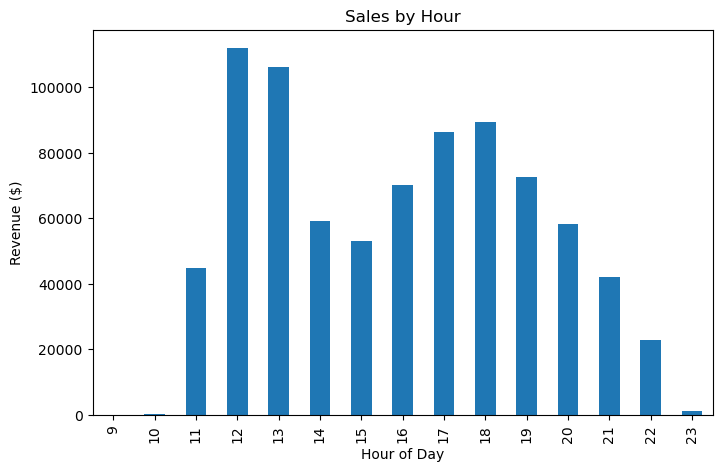

In [38]:
# Peak Hours Of Sales
df["time"] = pd.to_datetime(df["time"])
df["hour"] = df["time"].dt.hour

sales_by_hour = (df["quantity"] * df["price"]).groupby(df["hour"]).sum()
print(sales_by_hour)

# Plot
sales_by_hour.plot(kind="bar", figsize=(8,5), title="Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue ($)")
plt.show()

**Sales reach their highest point between 12:00 and 13:00**, highlighting lunchtime as the busiest period for the pizza place. There’s also a noticeable increase during the early supper hours (17:00–18:00). After 19:00, sales gradually decline until closing around 22:00, while mornings remain relatively quiet.

## **7. Find the total sales made on each day of the week. Which day of the week had the best sales**

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
dtype: float64


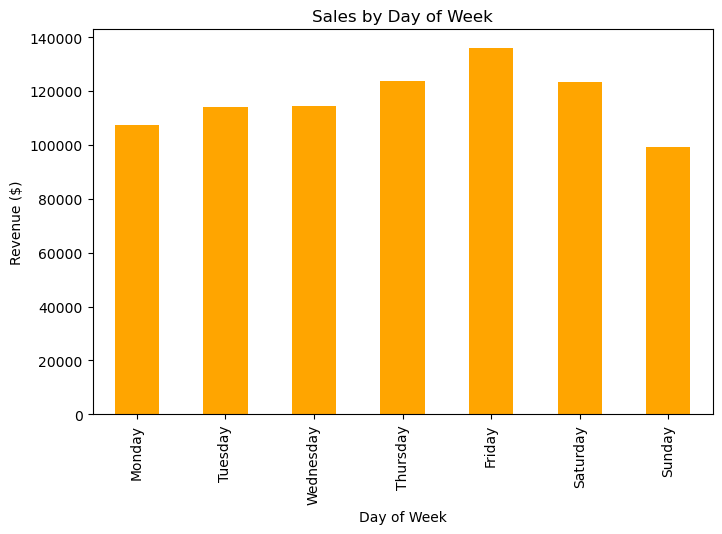

In [39]:
# Total Sales Made on Each Day of the Week and the Day With the Best Sale 
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.day_name()

sales_by_day = (df["quantity"] * df["price"]).groupby(df["day_of_week"]).sum()
print(sales_by_day.sort_values(ascending=False))

# Plot
sales_by_day = sales_by_day.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sales_by_day.plot(kind="bar", color="orange", figsize=(8,5), title="Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Revenue ($)")
plt.show()

The revenue analysis by day of the week shows that **Friday generates the highest sales (\$136,073.90)**, making it the busiest day for the pizza place. 
    
    Thursday ($123,528.50) and Saturday ($123,182.40) also perform strongly, while Sunday records the lowest sales at $99,203.50. 
    Overall, sales gradually build up from Monday through Friday, peak just before the weekend, and then decline on Sunday. 
    The chart scale ranges from 0 to $140,000 in intervals of $2,000, providing a clear comparison across the week.

## **8. Find the top 5 bestselling pizzas**

pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
Name: quantity, dtype: int64


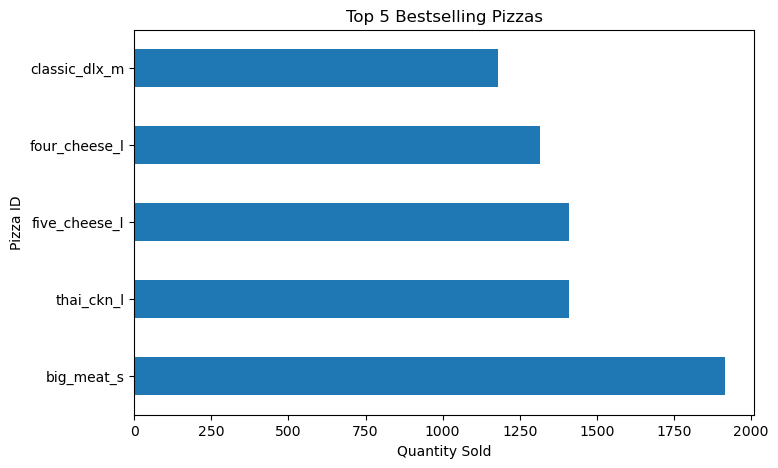

In [40]:
# Top 5 Best Selling Pizzas
top5 = df.groupby("pizza_id")["quantity"].sum().sort_values(ascending=False).head(5)
print(top5)

# Plot
top5.plot(kind="barh", figsize=(8,5), title="Top 5 Bestselling Pizzas")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza ID")
plt.show()

The sales data shows that the **Big Meat (size S) is the best-selling pizza**, with 1,914 units sold, clearly standing out from the rest. 
    The Thai Chicken (L) and Five Cheese (L) follow closely, with nearly equal sales of around 1,410 units each. 
    The Four Cheese (L) also performed strongly at 1,316 units, while the Classic Deluxe (M) rounds out the top five with 1,181 units sold. With sales ranging between 1,100 and 1,900, these pizzas demonstrate consistent customer preference, with the Big Meat pizza holding a clear lead.

## **9. Find the sales made in each month. Any trend noticeable?**

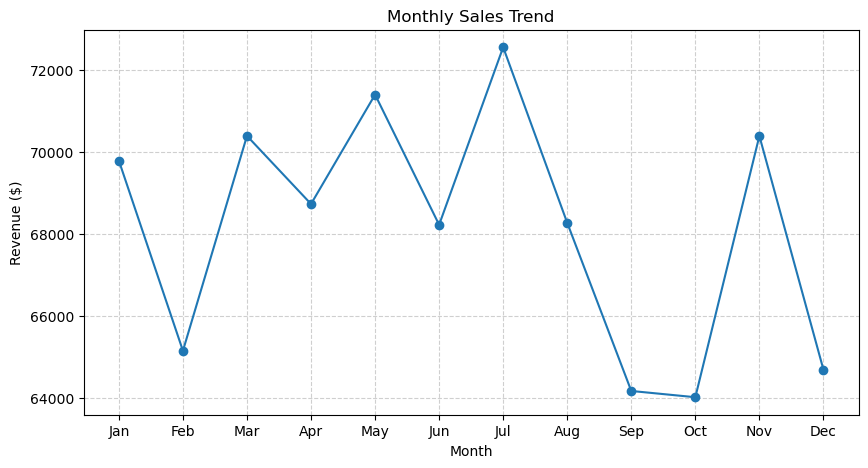

In [41]:
# Sales Made in each Month and trend noticed

# Extract month number and abbreviated month name
df["month_num"] = df["date"].dt.month
df["month_abbr"] = df["date"].dt.strftime("%b")   # Abbreviated month name

# Group by month number and month abbreviation
monthly_sales = (df["quantity"] * df["price"]).groupby([df["month_num"], df["month_abbr"]]).sum()

# Reset index and sort by month number
monthly_sales = monthly_sales.reset_index().sort_values("month_num")

# Plot with abbreviated month names
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["month_abbr"], monthly_sales[0], marker="o", linestyle="-")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)  # keep horizontal since short labels
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Monthly Sales Trend Summary**
The company's revenue fluctuated throughout the year. Sales peaked in **July ($73,200)**, while the lowets performance came in **October (64,000)**.
    
    Revenue rose in March, May, and November but dropped sharply in February, September, October , and December. This pattern suggests seasonal or operational influences affecting demand.

**Key Insight:** Sales tend to rise mid-year and recover briefly in November, but declines at the start and end of the year indicate missed opportunities.

**Recommendation:** The company should study what drove success in peak months and replicate those strategies during weak periods. Seasonal promotions and targeted marketing, especially in early and late months, could help smooth revenue fluctuations.

## **10. Are there pizza types that are not doing well on the menu?**

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
spin_pesto      970
ckn_pesto       973
ital_veggie     981
ckn_alfredo     987
green_garden    997
Name: quantity, dtype: int64


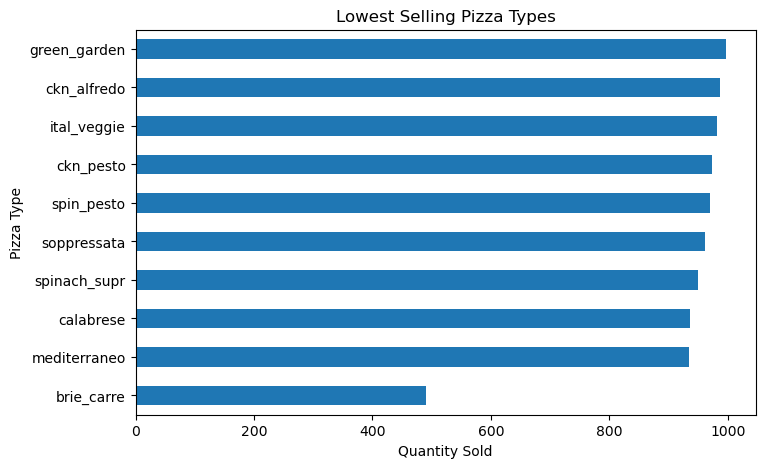

In [42]:
# Pizza Types on The Menu That Are Not Doing Well
pizza_performance = df.groupby("pizza_type_id")["quantity"].sum().sort_values()
print(pizza_performance.head(10))  # least selling pizzas

# Plot bottom 10 pizzas
pizza_performance.head(10).plot(kind="barh", figsize=(8,5), title="Lowest Selling Pizza Types")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizza Type")
plt.show()

The analysis of underperforming pizza types shows that **Brie Carre** is the least popular item on the menu, with only 490 units sold. Other low-selling pizzas include Mediterraneo (934), Calabrese (937), Spinach Supreme (950), and Soppressata (961). Even slightly better options such as Chicken Alfredo (987) and Green Garden (997) remain below 1,000 units sold for the year. With the chart scale ranging from 0 to 1,000 in intervals of 200, it is clear that these pizzas contribute very little compared to overall sales.

**Recommendation:** These low-performing pizzas could be either (1) removed from the menu to reduce costs, (2) rebranded or improved with better marketing and promotions, or (3) offered as part of bundle deals to increase customer interest. A focused review of customer feedback on these specific pizzas may help determine whether the issue is price, ingredients, or overall demand.

## **11. Extra Insights**

**a. Category Contribution to Revenue**

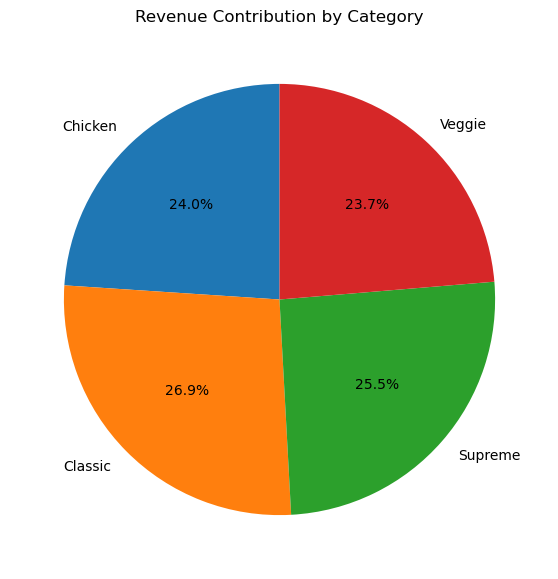

In [43]:
# Merge order_details with pizzas to get price and pizza_id info
pizza_sales = order_details.merge(pizzas, on="pizza_id")

# Add a sales column
pizza_sales['sales'] = pizza_sales['quantity'] * pizza_sales['price']
category_sales = pizza_sales.merge(pizza_types, on="pizza_type_id").groupby("category")['sales'].sum()

category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), startangle=90)
plt.title("Revenue Contribution by Category")
plt.ylabel("")
plt.show()

The revenue distribution across pizza categories shows a fairly balanced contribution. **Classic pizzas lead with 26.9%** of total sales, followed closely by **Supreme pizzas at 25.5%**. **Chicken pizzas account for 24%**, while **Veggie pizzas contribute 23.7%**, making them the least profitable category.  

**Insight:** The relatively even spread suggests that all categories are popular, but Classic and Supreme pizzas slightly outperform others in revenue generation.  

**Recommendation:** The company should continue to promote Classic and Supreme pizzas as flagship products while exploring strategies—such as combo deals or targeted marketing—to boost sales of Veggie pizzas, which show the lowest revenue share.

**b. Average Revenue per Order**

In [44]:
avg_order_value = total_revenue / total_orders
print(f"Average Revenue per Order: ${avg_order_value:.2f}")

Average Revenue per Order: $38.31


**c. Most Profitable Pizza vs Most Ordered Pizza**

In [45]:
pizza_profit = pizza_sales.groupby("pizza_id")['sales'].sum().sort_values(ascending=False).head(5)
print("Most Profitable Pizzas:")
print(pizza_profit)

Most Profitable Pizzas:
pizza_id
thai_ckn_l       29257.50
five_cheese_l    26066.50
four_cheese_l    23622.20
spicy_ital_l     23011.75
big_meat_s       22968.00
Name: sales, dtype: float64
